In [13]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

![](figure/1.jpg)

In [1]:
#-*-encoding:utf-8-*-
# @Author: Bingo Wan <bingo>
# @Date:   2017-06-09T17:38:08+08:00
# @Email:  wanwuko@gmail.com
# @Last modified by:   bingo
# @Last modified time: 2017-06-11T22:46:54+08:00
# @Copyright: The full copyright is belong to Bingo Wan

%pylab inline
%matplotlib inline 
from pylab import *
import matplotlib as mpl
import datetime
import pandas as pd
from scipy.interpolate import spline
import re

global date_tube;
date_tube = ('7/24', '7/25','7/26', '7/27', '7/28', '7/29', '7/30',
             '7/31', '8/01', '8/02', '8/03', '8/04', '8/05', '8/06')
global month; month = 7
global day; day = 26

Populating the interactive namespace from numpy and matplotlib


In [2]:
def byte(value):
    if value == '0':
        values = '0'
    if len(value) >= 4 and len(value) < 7:
        valuef = float(value)/1024
        valuef = round(valuef, 2)
        values = str(valuef)+'K'
    if len(value) >= 7 and len(value) < 11:
        valuef = float(value)/1024/1024
        valuef = round(valuef, 2)
        values = str(valuef)+'M'
    if len(value) >= 11 and len(value) < 15:
        valuef = float(value)/(1024**3)
        valuef = round(valuef, 2)
        values = str(valuef)+'G'
    if len(value) >= 15 and len(value) < 19:
        valuef = float(value)/(1024**4)
        valuef = round(valuef, 2)
        values = str(valuef)+'T'
    return values


In [14]:

class cpuload:
    def __init__(self, month=None, day=None):
        self.day = day
        self.month = month

    def getData(self, s):
        with open(s) as files:
            f = files.readlines()
            labels = []; dataset = []
            for data in f:
                d = re.split(' ', data)
                labels.append(d[0])
                dataset.append(float(d[-1].strip('\n')))
        return labels, dataset

    def figure(self):
        align = 'left'; clr = 'black'
        fig, ax = subplots(4,2)
        fig.set_size_inches(14, 14)
        la = []; da = []
        for i in range(1, 8):
            labels, dataset = self.getData('./result/1cpuload/presto/cpuload%d/result'%i)
            la.append(labels)
            da.append(dataset)
        x = np.arange(0, len(da[0][:7]))
        count = 0;
        for i in range(3):
            for j in range(2):
                if self.day > 31:
                    self.day = 1
                    self.month += 1
                ax[i][j].barh(x, da[count][:7])
                ax[i][j].set_title('%s/'%self.month+str(self.day), color='red', fontsize=20)
                ax[i][j].set_yticklabels(la[count][:7], fontsize=8)
                count += 1; self.day += 1
        #print da[]
        ax[3][0].barh(x, da[6][:7])
        ax[3][0].set_title('%s/'%self.month+str(self.day), color='red', fontsize=20)
        ax[3][0].set_yticklabels(la[6][:7], fontsize=8)
        #rects = ax.patches
        #for rect, label in zip(rects, labels[0:7]):
            #height = rect.get_height()
            #ax.text(height + 5, rect.get_y() + rect.get_width()/2,  dataset[0:7], ha='center', va='top')
        savefig('./figure/1_cpuload')

    def __call__(self):
        self.figure()

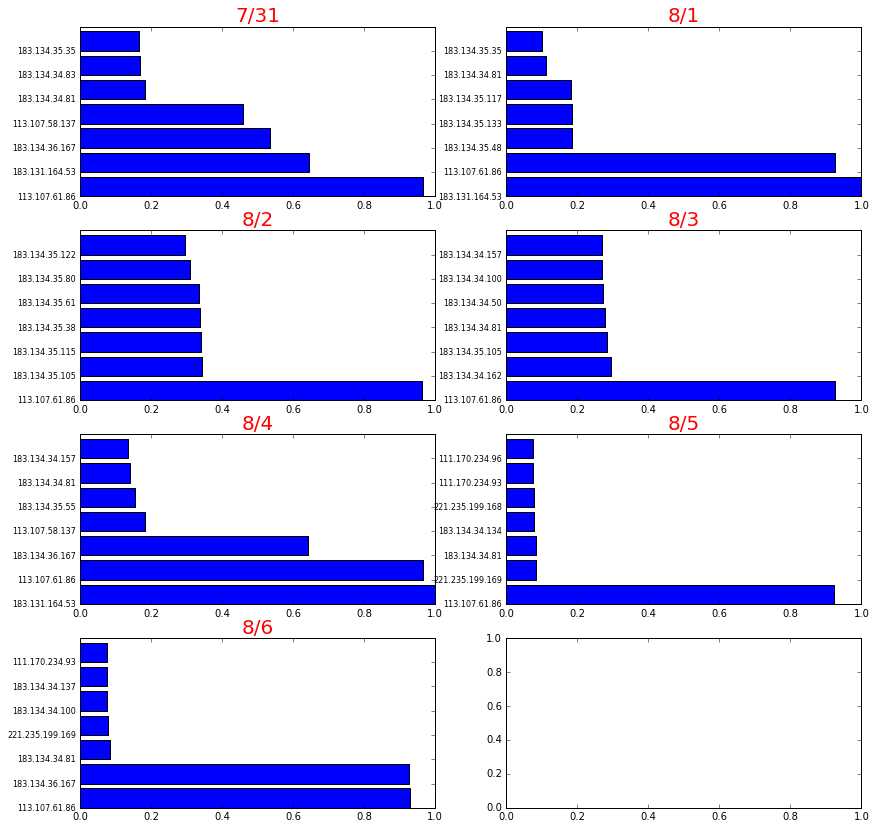

In [16]:
# 1
cpu = cpuload(month=month, day=31)
cpu()

#### 183.131.164.53 长期跑高

### 1、cpuload
### 2、嘉兴电信这周高负载的机器比例下降的比较多，jxdx81跑高。


In [17]:
class disk_RW:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def data_cluster_I(self):
        with open('./result/2clusterio/clusterio_tj') as files:
            f = files.readlines()
            dataset = {}; namelist = ['Product@XFDX', 'GDNS@XFDX', 'Product@JYDX','7daylog@HZDX']
            date_set = {}
            for i in range(4):
                dataset[namelist[i]] = []
            for data in f:
                if data == '\n':
                    continue
                d = re.split(' |#',data)
                if d[1] == 'write':
                    if d[0] == '襄樊通用业务集群（Product@XF）':
                        dataset['Product@XFDX'].append(float(d[2]))
                    if d[0] == '襄樊生产集群-GDNS':
                        dataset['GDNS@XFDX'].append(float(d[2]))
                    if d[0] == '揭阳通用业务集群':
                        dataset['Product@JYDX'].append(float(d[2]))
                    if d[0] == 'wsOAP':
                        dataset['7daylog@HZDX'].append(float(d[2]))
            #print len(dataset['Product@XFDX']), len(dataset['GDNS@XFDX']), len(dataset['Product@JYDX'])
            #print len(dataset['7daylog@HZDX'])
            return dataset

    def write_data_cluster_I(self):
        data = self.data_cluster_I(); data_smooth = {}
        namelist = ['Product@XFDX', 'GDNS@XFDX', 'Product@JYDX','7daylog@HZDX']
        files = open('./write/2clusterio/clusterio.in', 'w')
        files.write('date   Product@XFDX    GDNS@XFDX   Product@JYDX    7daylog@HZDX\n')
        count = 1;
        for i in range(len(data['Product@XFDX'])):
            if self.day > 30:
                self.month += 1
                self.day = 1
            files.write('%s/%s   %10s    %10s    %10s    %10s\n'%(self.month, self.day, data['Product@XFDX'][i],
                            data['GDNS@XFDX'][i], data['Product@JYDX'][i], data['7daylog@HZDX'][i]))
            if count % 4 == 0:
                self.day += 1
            count += 1

    def figure_cluster_I(self):
        data = self.data_cluster_I(); data_smooth = {}
        namelist = ['Product@XFDX', 'GDNS@XFDX', 'Product@JYDX','7daylog@HZDX']
        fig, ax = plt.subplots()
        fig.set_size_inches(12.5, 6)
        x = np.arange(0, 56)
        x_smooth = np.linspace(x.min(), x.max(), 200)
        for name in namelist:
            data[name] = np.array(data[name])
            #print len(x), len(date[name])
            data_smooth[name] = spline(x, data[name], x_smooth)
        for name in namelist:
            ax.plot(x_smooth, data_smooth[name], linestyle='-', label=name, linewidth ='4')
        # Colorcode the spine of the graph
        ax.spines['bottom'].set_color('r')
        ax.spines['top'].set_color('r')
        ax.spines['left'].set_color('r')
        ax.spines['right'].set_color('r')

        # Put the title and labels
        ax.set_title('DiskRW_R', color='red', fontsize=26)
        ax.set_xlabel('date', color='red', fontsize=16)
        ax.set_ylabel('M', color='red', fontsize=16)
        ax.set_xlim(0, 56)
        ax.set_xticks(np.arange(0,56, 4))
        ax.set_xticklabels(self.date_tube)
        ax.legend(loc='upper left')
        # Show the plot/image
        plt.tight_layout()
        plt.grid(alpha=0.8)
        #plt.legend()
        #plt.show()
        savefig('./figure/3_I')

    def write_data_cluster_O(self):
        data = self.data_cluster_O(); data_smooth = {}
        namelist = ['Product@XFDX', 'GDNS@XFDX', 'Product@JYDX','7daylog@HZDX']
        files = open('./write/2clusterio/clusterio.out', 'w')
        files.write('date   Product@XFDX    GDNS@XFDX   Product@JYDX    7daylog@HZDX\n')
        count = 1;
        for i in range(len(data['Product@XFDX'])):
            if self.day > 30:
                self.month += 1
                self.day = 1
            files.write('%s/%s   %10s    %10s    %10s    %10s\n'%(self.month, self.day, data['Product@XFDX'][i],
                            data['GDNS@XFDX'][i], data['Product@JYDX'][i], data['7daylog@HZDX'][i]))
            if count % 4 == 0:
                self.day += 1
            count += 1

    def data_cluster_O(self):
        with open('./result/2clusterio/clusterio_tj') as files:
            f = files.readlines()
            dataset = {}; namelist = ['Product@XFDX', 'GDNS@XFDX', 'Product@JYDX','7daylog@HZDX']
            date_set = {}
            for i in range(4):
                dataset[namelist[i]] = []
            for data in f:
                if data == '\n':
                    continue
                d = re.split(' |#',data)
                if d[1] == 'read':
                    if d[0] == '襄樊通用业务集群（Product@XF）':
                        dataset['Product@XFDX'].append(float(d[2]))
                    if d[0] == '襄樊生产集群-GDNS':
                        dataset['GDNS@XFDX'].append(float(d[2]))
                    if d[0] == '揭阳通用业务集群':
                        dataset['Product@JYDX'].append(float(d[2]))
                    if d[0] == 'wsOAP':
                        dataset['7daylog@HZDX'].append(float(d[2]))
            #print len(dataset['Product@XFDX']), len(dataset['GDNS@XFDX']), len(dataset['Product@JYDX'])
            #print len(dataset['7daylog@HZDX'])
            return dataset

    def figure_cluster_O(self):
        data = self.data_cluster_O(); data_smooth = {}
        namelist = ['Product@XFDX', 'GDNS@XFDX', 'Product@JYDX','7daylog@HZDX']
        fig, ax = plt.subplots()
        fig.set_size_inches(12.5, 6)
        x = np.arange(0, 56)
        x_smooth = np.linspace(x.min(), x.max(), 200)
        for name in namelist:
            data[name] = np.array(data[name])
            data_smooth[name] = spline(x, data[name], x_smooth)
        for name in namelist:
            ax.plot(x_smooth, data_smooth[name], linestyle='-', label=name, linewidth ='4')
        # Colorcode the spine of the graph
        ax.spines['bottom'].set_color('r')
        ax.spines['top'].set_color('r')
        ax.spines['left'].set_color('r')
        ax.spines['right'].set_color('r')

        # Put the title and labels
        ax.set_title('DiskRW_W', color='red', fontsize=26)
        ax.set_xlabel('date', color='red', fontsize=16)
        ax.set_ylabel('M', color='red', fontsize=16)
        ax.set_xlim(0, 56)
        ax.set_xticks(np.arange(0,56, 4))
        ax.set_xticklabels(self.date_tube)
        ax.legend(loc='upper left')
        # Show the plot/image
        plt.tight_layout()
        plt.grid(alpha=0.8)
        #plt.legend()
        #plt.show()
        savefig('./figure/3_O')

    def __call__(self):
        self.write_data_cluster_I()
        self.write_data_cluster_O()
        self.figure_cluster_I()
        self.figure_cluster_O()


### 集群磁盘读写

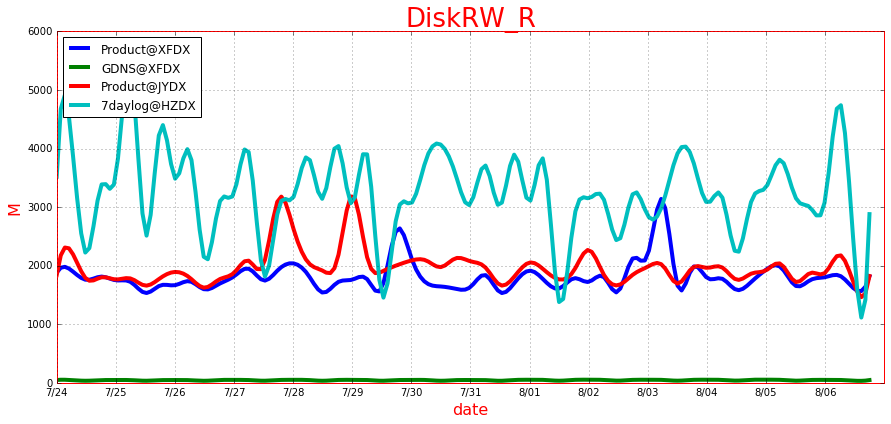

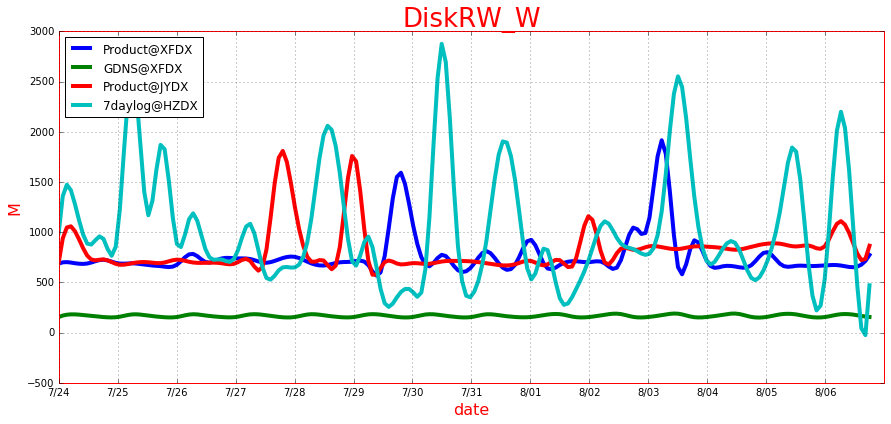

In [18]:
# 2
disk_IO = disk_RW(month=month, day=day, date_tube=date_tube)
disk_IO()

In [19]:
class network_IO:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def data_node(self, s, ip, name):
        with open(s) as files:
            f = files.readlines()
            namelist = ['Product@XFDX-I', 'GDNS@XFDX-I','Product@JYDX-I', '7DayLog@HZDX-I']; dataset = {};
            for data in f:
                s = re.split('-| ', data)
                if s[0] == ip:
                    name = s[1].strip('\n')
                    dataset[name] = []
                    continue
                d = s[1].strip('M\n')
                #print d
                dataset[name].append(float(d)/8)
            return dataset
    def write_data(self, name, dataset, io):
        files = open('./write/3datanode/%s.%s'%(name, io), 'w')
        files.write('date    %s\n'%io)
        count = 1;
        for data in dataset:
            if self.day > 30:
                self.month += 1
                self.day = 1
            files.write('%d/%d    %f\n'%(self.month, self.day, data))
            if count % 4 == 0:
                self.day += 1
            count += 1

    def write_node(self):
        namelist = ['Product@XFDX-I', 'GDNS@XFDX-I','Product@JYDX-I', '7DayLog@HZDX-I'];data = {}; data_smooth = {}
        ip1 = '111.170.234.72'; name1 = 'Product@XFDX-I'
        data[name1] = self.data_node('./result/3datanode/%s'%ip1, ip1, name1)
        ip2 = '111.170.234.117'; name2 = 'GDNS@XFDX-I'
        data[name2] = self.data_node('./result/3datanode/%s'%ip2, ip2, name2)
        ip3 = '113.107.58.115'; name3 = 'Product@JYDX-I'
        data[name3] = self.data_node('./result/3datanode/%s'%ip3, ip3, name3)
        ip4 = '183.131.164.24'; name4 = '7DayLog@HZDX-I'
        data[name4] = self.data_node('./result/3datanode/%s'%ip4, ip4, name4)
        for name in namelist:
            dataset = data[name]['intraffic']
            self.write_data(name, dataset, 'intraffic')
            dataset = data[name]['outtraffic']
            self.write_data(name, dataset, 'outtraffic')

    def figure_node_I(self):
        namelist = ['Product@XFDX-I', 'GDNS@XFDX-I', 'Product@JYDX-I', '7DayLog@HZDX-I'];data = {}; data_smooth = {}
        ip1 = '111.170.234.72'; name1 = 'Product@XFDX-I'
        data[name1] = self.data_node('./result/3datanode/%s'%ip1, ip1, name1)
        ip2 = '111.170.234.117'; name2 = 'GDNS@XFDX-I'
        data[name2] = self.data_node('./result/3datanode/%s'%ip2, ip2, name2)
        ip3 = '113.107.58.115'; name3 = 'Product@JYDX-I'
        data[name3] = self.data_node('./result/3datanode/%s'%ip3, ip3, name3)
        ip4 = '183.131.164.24'; name4 = '7DayLog@HZDX-I'
        data[name4] = self.data_node('./result/3datanode/%s'%ip4, ip4, name4)
        colors = {'Product@XFDX-I':'b', 'GDNS@XFDX-I':'y', 'Product@JYDX-I':'g', '7DayLog@HZDX-I':'r'}
        #print data
        fig, ax = plt.subplots()
        fig.set_size_inches(12.5, 6)
        x = np.arange(0, 56)
        limit_y = {'Product@XFDX-I':np.full(56, 375), 'GDNS@XFDX-I': np.full(56, 1250), 'Product@JYDX-I':np.full(56, 1250),
                   '7DayLog@HZDX-I': np.full(56, 375)}
        x_smooth = np.linspace(x.min(), x.max(), 200)
        for name in namelist:
            data[name]['intraffic'] = np.array(data[name]['intraffic'])
            #print len(x), len(data[name]['intraffic'])
            data_smooth[name] = spline(x, data[name]['intraffic'], x_smooth)
        for name in namelist:
            ax.plot(x, limit_y[name], linestyle='--', label=name, linewidth ='4', color=colors[name])
            ax.plot(x_smooth, data_smooth[name], linestyle='-', label=name, linewidth ='4', color=colors[name])

        # Colorcode the spine of the graph
        ax.spines['bottom'].set_color('r')
        ax.spines['top'].set_color('r')
        ax.spines['left'].set_color('r')
        ax.spines['right'].set_color('r')

        # Put the title and labels
        ax.set_title('DataNode_I', color='red', fontsize=26)
        ax.set_xlabel('date', color='red', fontsize=16)
        ax.set_ylabel('M(Bytes/second)', color='red', fontsize=16)
        ax.set_xlim(0, 56)
        ax.set_ylim(0, 400)
        ax.set_xticks(np.arange(0,56, 4))
        ax.set_xticklabels(self.date_tube)
        # Show the plot/image
        plt.tight_layout()
        plt.grid(alpha=0.8)
        plt.legend()
        #plt.show()
        savefig('./figure/DataNode_I')

    def figure_node_O(self):
        namelist = ['Product@XFDX-I', 'GDNS@XFDX-I','Product@JYDX-I', '7DayLog@HZDX-I'];data = {}; data_smooth = {}
        ip1 = '111.170.234.72'; name1 = 'Product@XFDX-I'
        data[name1] = self.data_node('./result/3datanode/%s'%ip1, ip1, name1)
        ip2 = '111.170.234.117'; name2 = 'GDNS@XFDX-I'
        data[name2] = self.data_node('./result/3datanode/%s'%ip2, ip2, name2)
        ip3 = '113.107.58.115'; name3 = 'Product@JYDX-I'
        data[name3] = self.data_node('./result/3datanode/%s'%ip3, ip3, name3)
        ip4 = '183.131.164.24'; name4 = '7DayLog@HZDX-I'
        data[name4] = self.data_node('./result/3datanode/%s'%ip4, ip4, name4)
        colors = {'Product@XFDX-I':'b', 'GDNS@XFDX-I':'y', 'Product@JYDX-I':'g', '7DayLog@HZDX-I':'r'}
        #print data
        fig, ax = plt.subplots()
        fig.set_size_inches(12.5, 6)
        x = np.arange(0, 56)
        x_smooth = np.linspace(x.min(), x.max(), 200)
        limit_y = {'Product@XFDX-I':np.full(56, 375), 'GDNS@XFDX-I': np.full(56, 1250), 'Product@JYDX-I':np.full(56, 1250),
                   '7DayLog@HZDX-I': np.full(56, 375)}
        for name in namelist:
            data[name]['outtraffic'] = np.array(data[name]['outtraffic'])
            #print len(x), len(data[name]['intraffic'])
            data_smooth[name] = spline(x, data[name]['outtraffic'], x_smooth)
        for name in namelist:
            ax.plot(x, limit_y[name], linestyle='--', label=name, linewidth ='4', color=colors[name])
            ax.plot(x_smooth, data_smooth[name], linestyle='-', label=name, linewidth ='4', color=colors[name])
        # Colorcode the spine of the graph
        ax.spines['bottom'].set_color('r')
        ax.spines['top'].set_color('r')
        ax.spines['left'].set_color('r')
        ax.spines['right'].set_color('r')

        # Put the title and labels
        ax.set_title('DataNode_O', color='red', fontsize=26)
        ax.set_xlabel('date', color='red', fontsize=16)
        ax.set_ylabel('M(Bytes/second)', color='red', fontsize=16)
        ax.set_xlim(0, 56)
        ax.set_ylim(0, 400)
        ax.legend(loc="upper left")
        ax.set_xticks(np.arange(0,56, 4))
        ax.set_xticklabels(self.date_tube)
        # Show the plot/image
        plt.tight_layout()
        plt.grid(alpha=0.8)
        #plt.legend()
        #plt.show()
        savefig('./figure/DataNode_O')

    def __call__(self):
        self.write_node()
        self.figure_node_I()
        self.figure_node_O()


/home/bingo/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(56, 375) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/home/bingo/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(56, 1250) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


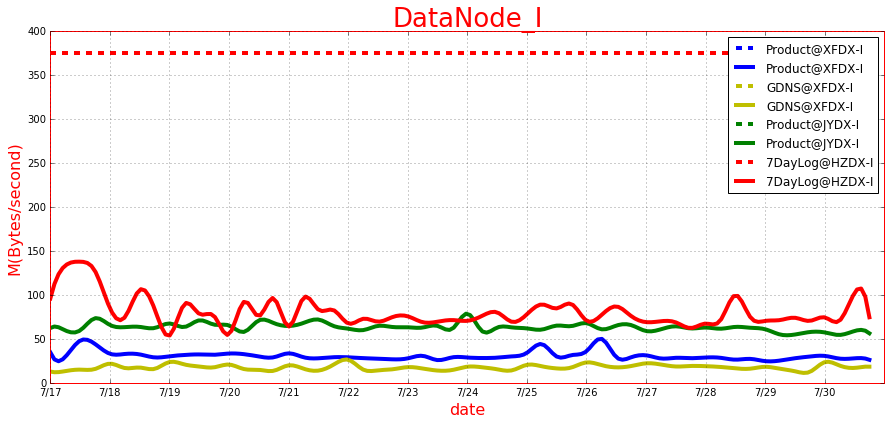

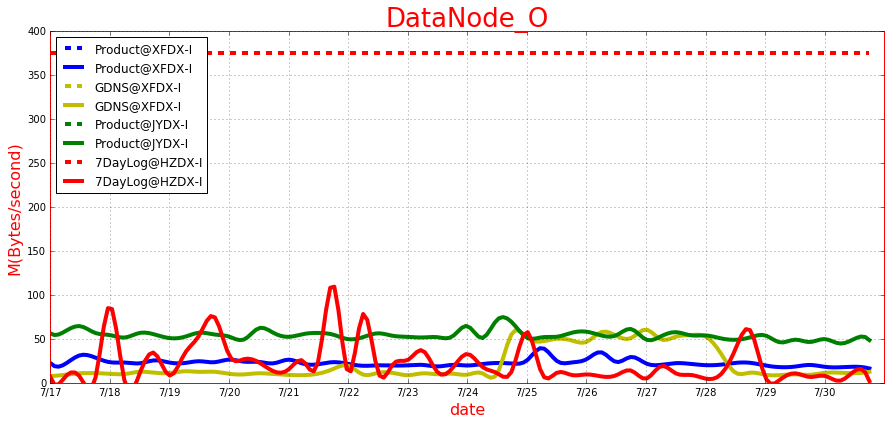

In [37]:
# 3
net_IO = network_IO(month=5, day=29, date_tube=date_tube)
net_IO()

In [11]:
class hdfs:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def data_hdfs_usage(self):
        with open('./result/4HDFS_usage/usage_result') as files:
            f = files.readlines()
            dataset = {}; date_statu = {}; count = 0; countn = 0;namelist = ['Product@XF', 'GDNS@XF', 'Product@JY', 
                                                                             'Prouduc@SQ']
            date_set = {}
            for i in range(4):
                dataset[namelist[i]] = []
                date_statu[namelist[i]] = []
                date_set[namelist[i]] = []
            for data in f:
                if data == '\n':
                    continue
                d = re.split(' |#',data)
                if d[0] == '':
                    countn += 1
                    continue
                else:
                    if countn == 3:
                        dataset[namelist[countn]].append(float(d[2]))
                        date_statu[namelist[countn]] = True
                    else:
                        dataset[namelist[countn]].append(float(d[2]))
                        date_set[namelist[countn]].append(d[1])
                        if len(date_set[namelist[countn]])>3:   # to detect the status but begins with len()>3
                            if date_set[namelist[countn]][0] == date_set[namelist[countn]][1]:
                                date_statu[namelist[countn]] = False
                            else:
                                date_statu[namelist[countn]] = True
            return dataset, date_statu

    def write_hdfs_usage(self):
        data, statu_usage = self.data_hdfs_usage(); data_smooth = {}
        namelist = ['Product@XF', 'GDNS@XF', 'Product@JY']
        files = open('./write/4HDFS_usage/usage', 'w')
        files.write('date     Product@XF      GDNS@XF    Product@JY\n')
        count = 1;
        for i in range(7):
            if self.day > 30:
                self.month += 1
                self.day = 1
            if i < 7:
                files.write('%s/%s   %10s    %10s    %10s\n'%(month, day, data['Product@XF'][i],
                            data['GDNS@XF'][i], data['Product@JY'][i]))
            else:
                files.write('%s/%s   %10s    %10s    %10s\n'%(self.month, self.day, '0',
                            '0', data['Product@JY'][i]))
            self.day += 1
            count += 1
    def data_hdfs_used(self):
        with open('./result/4HDFS_usage/used_result') as files:
            f = files.readlines()
            dataset = {}; date_statu = {}; count = 0; countn = 0;namelist = ['Product@XF', 'GDNS@XF', 'Product@JY',
                                                                            'Prouduc@SQ']
            date_set = {}
            for i in range(4):
                dataset[namelist[i]] = []
                date_statu[namelist[i]] = []
                date_set[namelist[i]] = []
            #print f
            for data in f:
                if data == '\n':
                    continue
                d = re.split(' |#',data)
                if d[0] == '':
                    countn += 1
                    continue
                else:
                    if countn == 3:
                        dataset[namelist[countn]].append(float(d[4]))
                        date_statu[namelist[countn]] = True
                    else:
                        dataset[namelist[countn]].append(float(d[4]))
                        date_set[namelist[countn]].append(d[3])
                        if len(date_set[namelist[countn]])>3:
                            if date_set[namelist[countn]][0] == date_set[namelist[countn]][1]:
                                date_statu[namelist[countn]] = False
                            else:
                                date_statu[namelist[countn]] = True
            return dataset, date_statu
    def write_hdfs_used(self):
        data, statu_usage = self.data_hdfs_used(); data_smooth = {}
        namelist = ['Product@XF', 'GDNS@XF', 'Product@JY']
        files = open('./write/4HDFS_usage/used', 'w')
        files.write('date     Product@XF      GDNS@XF    Product@JY\n')
        count = 1; month = 5; day = 1
        for i in range(7):
            if self.day > 30:
                self.month += 1
                self.day = 1
            if i < 7:
                files.write('%s/%s   %10s    %10s    %10s\n'%(month, day, data['Product@XF'][i],
                            data['GDNS@XF'][i], data['Product@JY'][i]))
            else:
                files.write('%s/%s   %10s    %10s    %10s\n'%(month, day, '0',
                            '0', data['Product@JY'][i]))

            self.day += 1
            count += 1

    def figure_hdfs_usage(self):
        data_usage, statu_usage = self.data_hdfs_usage(); data_used, statu_used = self.data_hdfs_used()
        namelist = ['Product@XF', 'GDNS@XF', 'Product@JY', 'Prouduc@SQ']
        colors = {'Product@XF':'b', 'GDNS@XF':'y', 'Product@JY':'g', 'Prouduc@SQ':'r'}
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        fig.set_size_inches(14, 8)
        N = 27
        ind = np.arange(0,N,2); ind1 = np.arange(14,28,2)  # the x locations for the groups
        width = 0.5; width1 = 0      # the width of the bars
        count = 0; bar = [0, 0, 0, 0]
        for name in namelist:
            #print len(data_usage[name]), name, data_usage[name]
            #print len(data_used[name]), name, data_used[name]
            if statu_usage[name] == True and len(data_usage[name])==14:
                bar[count] = ax1.bar(ind+width1, data_usage[name], width=width,label='UsedVolume-'+name, color=colors[name], alpha = .5, )
                ax2.plot(ind+width1+width/2, data_used[name], color=colors[name], label='UsedPercent-'+name, marker = 'o',linewidth='3', linestyle='-')
                #ax2.scatter(ind+width1+width/2, data_used[name], s=75, color=colors[name], alpha=.9)
                count += 1
                width1 += width
            if statu_usage[name] == True and len(data_usage[name])==7:
                bar[count] = ax1.bar(ind1+width1, data_usage[name], width=width,label='UsedVolume-'+name, color=colors[name], alpha = .5, )
                ax2.plot(ind1+width1+width/2, data_used[name], color=colors[name], label='UsedPercent-'+name, marker = 'o',linewidth='3', linestyle='-')
                #ax2.scatter(ind+width1+width/2, data_used[name], s=75, color=colors[name], alpha=.9)
                count += 1
                width1 += width
        ax1.set_title('product cluster', fontsize=26)
        ax1.set_xticks(ind+width/2)
        ax1.set_ylabel('hdfs_usage/T', fontsize=16 )
        ax1.set_ylim(0, 2600)
        ax1.tick_params('y', colors='black', labelsize=18)    #set scale like size, color
        ax1.set_xticklabels(date_tube)
        ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45) #rotate the xlabel
        ax2.set_xlim(0, 28)
        ax2.set_ylim(0, 100)
        ax2.set_ylabel('hdfs_used', fontsize=16 )
        ax2.tick_params('y', colors='b', labelsize=16)
        #ax1.legend((bar[0], bar[1], bar[2]), ('UsedVolume-Product@XF', 'UsedVolume-GDNS@XF', 'UsedVolume-Product@JY'),loc='upper left')
        ax1.legend(loc = 'upper left')
        ax2.legend()

        #plt.show()
        savefig('./figure/hafs')

    def __call__(self):
        self.write_hdfs_usage()
        self.write_hdfs_used()
        self.figure_hdfs_usage()




### 4、集群存储

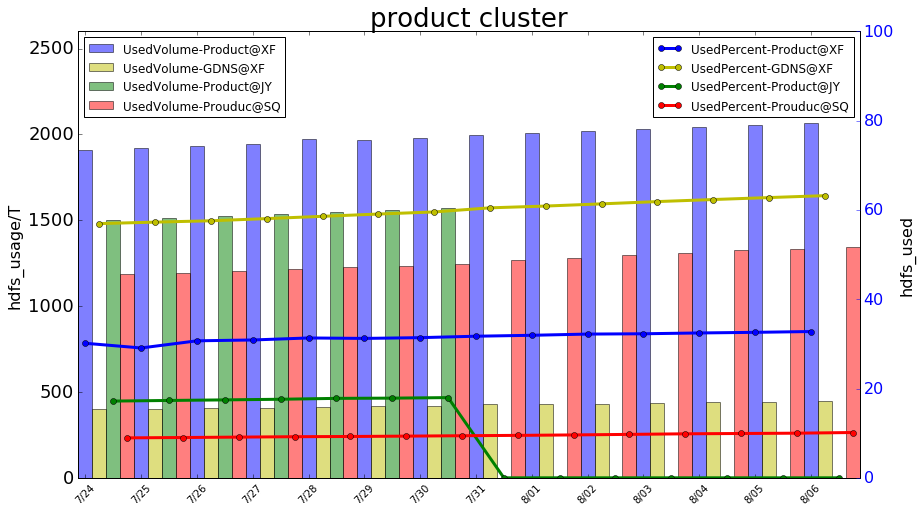

In [12]:
# 4
hd = hdfs(month=month, day=day, date_tube=date_tube)
hd()

#### 1、hdfs存储没有特别情况

In [9]:
class log:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def data_log(self, s):
        dataset = {}
        with open('./result/5log/%s.final'%s) as files:
            f = files.readlines()
            usage= []; used = []
            for data in f:
                usage1 = re.split(' ',data)[0]
                used1 = re.split(' ',data)[-1].strip('\n')
                usage.append(float(usage1))
                used.append(float(used1))
            dataset[s] = {}
            dataset[s]['usage'] = usage
            dataset[s]['used'] = used
            return dataset[s]

    def write_data(self, dataset1, dataset2, io):
        files = open('./write/5log/%s'%(io), 'w')
        files.write('date      WsLog-JX        WsLog-HZ\n')
        count = 1;
        for i in range(14):
            if self.day > 30:
                self.month += 1
                self.day = 1
            files.write('%d/%d    %f    %f\n'%(self.month, self.day, dataset1[i], dataset2[i]))
            self.day += 1
            count += 1
        files.close()

    def write_hdfs_log(self):
        data = {}
        namelist = ['WsLog-JX', 'WsLog-HZ']
        for name in namelist:
            data[name] = self.data_log(name)
        namelist = ['WsLog-JX', 'WsLog-HZ']
        dataset1 = data['WsLog-JX']['usage']
        dataset2 = data['WsLog-HZ']['usage']
        self.write_data(dataset1, dataset2, 'usage')
        dataset1 = data['WsLog-JX']['used']
        dataset2 = data['WsLog-HZ']['used']
        self.write_data(dataset1, dataset2, 'used')

    def figure_log(self):
        dataset = {}
        namelist = ['WsLog-JX', 'WsLog-HZ', 'WsLog-SQ']
        for name in namelist:
            dataset[name] = self.data_log(name)
        colors = {'WsLog-JX':'b', 'WsLog-HZ':'y', 'WsLog-SQ':'g'}
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        fig.set_size_inches(14, 8)
        N = 27
        ind = np.arange(0,N,2); ind1 = np.arange(13,N,2)  # the x locations for the groups
        width = 0.5; width1 = 0; count = 0     # the width of the bars
        lns1 = [0,0,0]; lns2 = [0,0,0,0];count1 = 0; count2 = 0
        for name in namelist:
            lns1[count1] = (ax1.bar(ind+width1, dataset[name]['usage'], label='UsedVolume-'+name , width=width,
                                 color=colors[name], alpha = .5, ))
            count1 += 1
            lns2[count2] = ax2.plot(ind+width1+width/2, dataset[name]['used'],label='UsedPercent-'+name, marker = 'o', color=colors[name], linewidth='3', linestyle='-')
            count2 += 1
            width1 += width
            count += 1;
        ax1.set_title('LOG Storage', color='red', fontsize=26)
        ax1.set_xticks(ind+width/2)
        ax1.set_ylabel('Log Cluster', color='blue', fontsize=16 )
        ax1.set_ylim(0, 25000)
        #ax1.legend((rects[0],), ('UsedVolume-WsLog-JX',))
        ax1.tick_params('y', colors='black', labelsize=18)    #set scale like size, color
        ax1.set_xticklabels(date_tube)
        ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45) #rotate the xlabel
        #lns1 = lns1[0][0]+lns1[1][0]
        #labs1 = [l.get_label() for l in lns1]
        ax1.legend(loc='upper left')
        ax2.legend()


        ax2.set_xlim(0, 28)
        ax2.set_ylim(0, 100)
        ax2.set_ylabel('', fontsize=16 )
        ax2.tick_params('y', colors='b', labelsize=16)
        #print len(lns)
        #plt.show()
        savefig('./figure/logstorage')
    def __call__(self):
        self. write_hdfs_log()
        self.figure_log()

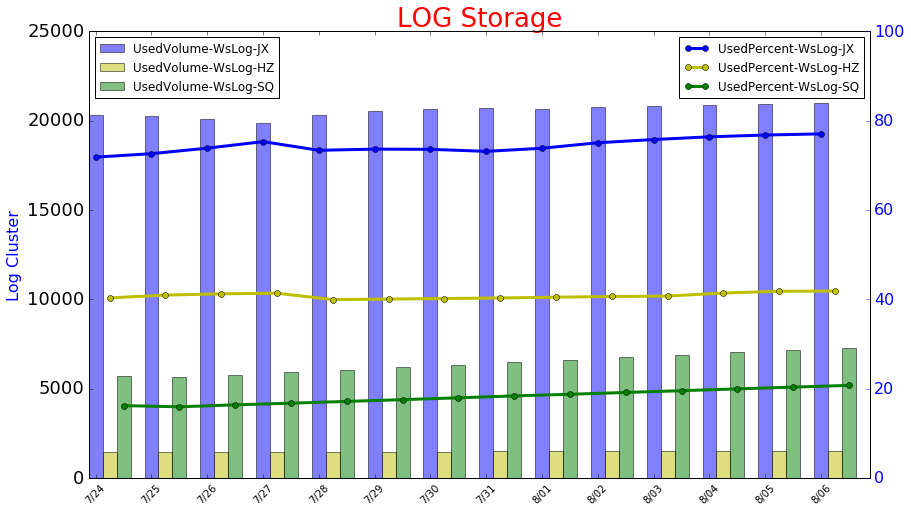

In [10]:
# 5 
l = log(month=month, day=day, date_tube=date_tube)
l()

### 5、原始日志集群存储

####  1、
####  

In [23]:
class logjob:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def data_job(self, s):
        with open('./result/6-7job/%s.final1'%s) as files:
            f = files.readlines()
            dataset = {}
            
            usage= []; used = []
            for data in f:
                usage1 = re.split(' ', data)[0]
                used1 = re.split(' ', data)[-1].strip('\n')
                usage.append(float(usage1))
                used.append(float(used1))
            dataset[s] = {}
            dataset[s]['usage'] = usage
            dataset[s]['used'] = used
            return dataset[s]
    def fig_job(self):
        namelist = ['hz', 'jx']; dataset = {}
        for name in namelist:
            dataset[name] = self.data_job(name)
        fig, ax = plt.subplots()
        fig.set_size_inches(12, 4)
        N = 27
        colors = {'hz':'b', 'jx':'y'}
        ind = np.arange(0,N,2)
        for name in namelist:
            ax.plot(ind, dataset[name]['usage'], label='UsedVolume-'+name, marker = 'o', color=colors[name],
                    linewidth='3', linestyle='-')
        ax.set_title('LOG Storage', color='red', fontsize=26)
        ax.set_ylim(20, 80)
        ax.set_ylabel('T', color='blue', fontsize=16 )
        ax.set_xlim(0, 28)
        ax.set_xticks(np.arange(0,28, 2))
        ax.set_xticklabels(self.date_tube)
        ax.legend(loc='upper left')
        #plt.show()
        savefig('./figure/6-7job')
    def __call__(self):
        self.fig_job()

In [24]:
def write_job1():
    with open('./result/6-7job/hz.final1') as files:
        f = files.readlines()
        file1 = open('./write/6-7job/hz', 'w') 
        file1.write('date   logstroage    jobnum\n')
        count = 1; month = 4; day = 24
        for data in f:
            d = re.split(' ', data)
            if day > 30:
                month += 1
                day = 1
            jobnum = float(d[-1].strip('\n'))
            file1.write('%d/%d    %f    %f\n'%(month, day, float(d[0]), jobnum))
            day += 1  
    file1.close()
    with open('./result/6-7job/jx.final1') as files:
        f = files.readlines()
        file1 = open('./write/6-7job/jx', 'w') 
        file1.write('date   logstroage    jobnum\n')
        count = 1; month = 4; day = 24
        for data in f:
            d = re.split(' ', data)
            if day > 30:
                month += 1
                day = 1
            jobnum = float(d[-1].strip('\n'))
            file1.write('%d/%d    %f    %f\n'%(month, day, float(d[0]), jobnum))
            day += 1  
    file1.close()

write_job1()

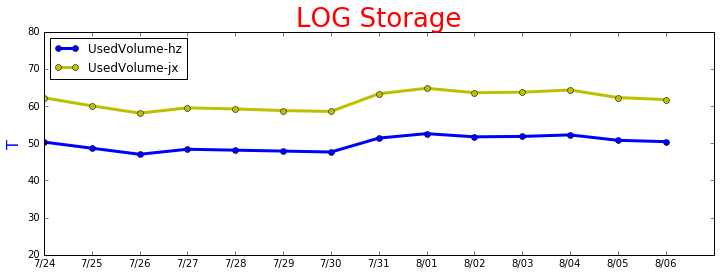

In [25]:
# 6
joblog = logjob(month=month, day=day, date_tube=date_tube)
joblog()

### 日志集群入库
#### 1、上周原始日志集群入库良好

In [26]:
class mdio:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def data_mdio(self):
        with open('./result/8mdio/metric_day') as files:
            f = files.readlines()
            namelist = []; dataset = {};
            flag = True
            for data in f:
                if flag == True:
                    s = re.split('\.| ', data)
                else:
                    s = re.split(' ', data)
                if s[0] == 'gdp-mdio':
                    name = s[3]
                    if name == 'monData':
                        flag = False
                    namelist.append(name)
                    dataset[name] = []
                    continue
                if name == 'monData':
                    dataset[name].append(float(s[1])/1024)
                else:
                    dataset[name].append(float(s[1]))
            return dataset, namelist

    def write_mdio(self):
        data, namelsit1 = self.data_mdio(); data_smooth = {}
        namelist = ['phnx', 'pavo', 'hgls','monData']
        files = open('./write/8mdio/mdio', 'w')
        files.write('date         phnx         pavo         hgls        monData\n')
        count = 1;
        for i in range(len(data['phnx'])):
            if self.day > 30:
                self.month += 1
                self.day = 1
            files.write('%s/%s   %10s    %10s    %10s    %10s\n'%(self.month, self.day, data['phnx'][i],
                            data['pavo'][i], data['hgls'][i], data['monData'][i]))
            if count % 4 == 0:
                self.day += 1
            count += 1

    def figure_mdio(self):
        data, namelist = self.data_mdio()
        fig, ax = plt.subplots()
        fig.set_size_inches(12.5, 4)
        data_smooth = {}
        x = np.arange(0, 56)
        x_smooth = np.linspace(x.min(), x.max(), 200)
        for name in namelist:
            data[name] = np.array(data[name])
            data_smooth[name] = spline(x, data[name], x_smooth)
        lns = [0,0,0,0]; count = 0
        for name in namelist:
            if name != 'monData':
                lns[count] = ax.plot(x_smooth, data_smooth[name], linestyle='-', label=name, linewidth ='4')
                count += 1
        # Colorcode the spine of the graph
        ax.spines['bottom'].set_color('r')
        ax.spines['top'].set_color('r')
        ax.spines['left'].set_color('r')
        ax.spines['right'].set_color('r')

        # Put the title and labels
        ax.set_title('Mdio Metric ', color='red', fontsize=26)
        ax.set_xlabel('date', color='red', fontsize=16)
        ax.set_ylabel('M', color='red', fontsize=16)
        #ax.set_ylim(100000, 350000)
        ax.set_xlim(0, 56)
        ax.set_xticks(np.arange(0,56, 4))
        ax.set_xticklabels(self.date_tube)
        ax2 = ax.twinx()
        if name == 'monData':
            lns[3] = ax2.plot(x_smooth, data_smooth[name], linestyle='-', label=name, linewidth ='4', color = 'y', marker='o')
            ax2.set_ylabel('M', color='red', fontsize=16)
            #ax2.legend()
            #ax.set_ylim(100000, 350000)
        # Show the plot/image
        lns = lns[0]+lns[1]+lns[2]+lns[3]
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc=0)
        ax2.set_ylim(200, 12000)
        #plt.tight_layout()
        plt.grid(alpha=0.8)
        #plt.show()
        savefig('./figure/8mdio_metric')

    def __call__(self):
        self.write_mdio()
        self.figure_mdio()

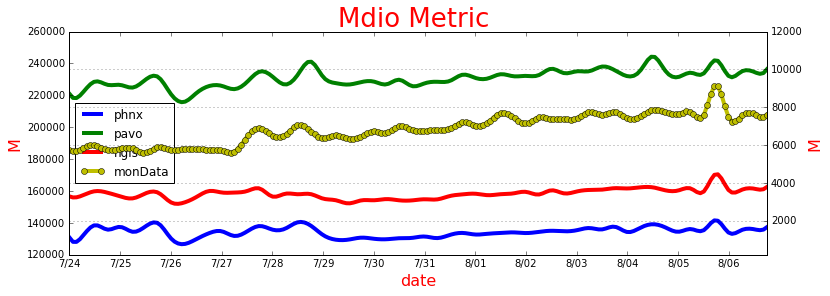

In [27]:
# 8
md = mdio(month=month, day=day, date_tube=date_tube)
md()

### mido 指标
#### mdio　18号19号间出现大量小文件，pavo处理不过来

In [8]:
class region:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def data_HBase(self):
        namelist = ['Product@XFHbase-G', 'Product@XFHbase-C', 'Product@JYHbase-G', 'Product@JYHbase-C', 
                    'Product@SQHbase-G', 'Product@SQHbase-C','Product@SQHbase-TSDB']
        with open('./result/9region/region_result') as files:
            f = files.readlines()
            #print f
            dataset = {}
            name_alias = {}
            count = 0
            for name in namelist:
                name_alias[count] = name
                count += 1
            count = 0
            for name in namelist:
                dataset[name] = []
            count1 = 0
            for data in f:
                if data.strip('\n')[0] == '#':
                    count1 += 1
                    continue
                dataset[name_alias[count1]].append(float(data.strip('\n')))
            return dataset

    def data_write9(self):
        with open('./write/9region/region.dat','w') as files:
            namelist = ['Product@XFHbase-G', 'Product@XFHbase-C', 'Product@JYHbase-G', 'Product@JYHbase-C',
                        'Product@SQHbase-G','Product@SQHbase-C','Product@SQHbase-TSDB',
                        'AVG@XFHbase-G', 'AVG@XFHbase-C', 'AVG@JYHbase-G',  'AVG@JYHbase-C',
                        'AVG@SQHbase-G','AVG@SQHbase-C','AVG@SQHbase-TSDB']
            region = {'AVG@XFHbase-G':18, 'AVG@JYHbase-G':20, 'AVG@XFHbase-C':20, 'AVG@JYHbase-C':16, 'AVG@SQHbase-G':20,'AVG@SQHbase-C':20,'AVG@SQHbase-TSDB':20}
            month = self.month; daystart = self.day - 1

            files.write('%s  %20s  %20s   %20s  %20s  %20s  %20s  %20s\n'
                        %('date', namelist[0], namelist[1], namelist[2], namelist[3], namelist[4], namelist[5], namelist[6]))
            favg = open('./write/9region/region_avg.dat','w')
            favg.write('%s  %20s  %20s   %20s  %20s %20s  %20s  %20s\n'
                        %('date', namelist[7], namelist[8], namelist[9], namelist[10], namelist[11], namelist[12], namelist[13]))
            data = self.data_HBase()
            count = 0; count_day = 1; avg = [0, 0, 0, 0, 0, 0, 0]; sum_avg = [0, 0, 0, 0, 0, 0, 0]; 
            incre_avg = [0, 0, 0, 0, 0, 0, 0]
            for d in data[namelist[0]]:
                daystart += 1
                if daystart > 31:
                    month += 1
                    daystart = 1
                #print d
                avg[0] = data[namelist[0]][count]/region[namelist[7]]
                avg[1] = data[namelist[1]][count]/region[namelist[8]]
                avg[2] = data[namelist[2]][count]/region[namelist[9]]
                avg[3] = data[namelist[3]][count]/region[namelist[10]]
                avg[4] = data[namelist[4]][count]/region[namelist[11]]
                avg[5] = data[namelist[5]][count]/region[namelist[12]]
                avg[6] = data[namelist[6]][count]/region[namelist[13]]
                files.write('%s/%s   %20s   %20s   %20s  %20s  %20s   %20s  %20s\n'%(month, daystart, data[namelist[0]][count], data[namelist[1]][count],                                                   data[namelist[2]][count], data[namelist[3]][count], data[namelist[4]][count], data[namelist[5]][count],data[namelist[6]][count]))
                favg.write('%s/%s   %20s   %20s   %20s  %20s  %20s   %20s  %20s\n'%(month, daystart, int(avg[0]), 
                                        int(avg[1]),int(avg[2]), int(avg[3]), int(avg[4]), int(avg[5]),int(avg[6])))
                count += 1
                for i in range(7):
                    sum_avg[i] += avg[i]
            region_servers = [21.0, 24.0, 18.0, 16.0, 19, 18, 10]
            for i in range(7):
                incre_avg[i] += (data[namelist[i]][count-1] - data[namelist[i]][7])/7/region_servers[i]
            favg.write('%s  %20s   %20s   %20s  %20s   %20s   %20s  %20s  \n'%("avg" , int(sum_avg[0]/(count)), int(sum_avg[1]/(count)), int(sum_avg[2]/(count)), int(sum_avg[3]/(count)), int(sum_avg[1]/(count)),int(sum_avg[2]/(count)), int(sum_avg[3]/(count)) ))
            favg.write('%s  %20s   %20s   %20s  %20s  %20s   %20s  %20s \n'%("avg_increment", 
                        incre_avg[0], incre_avg[1],incre_avg[2], incre_avg[3], incre_avg[4],incre_avg[5], incre_avg[6]))
            favg.close()

    def figure_HBase(self):
        dataset = self.data_HBase()
        fig, ax = plt.subplots()
        fig.set_size_inches(12, 6)
        namelist = ['Product@XFHbase-G', 'Product@XFHbase-C', 'Product@JYHbase-G', 'Product@JYHbase-C', 
                    'Product@SQHbase-G', 'Product@SQHbase-C','Product@SQHbase-TSDB']
        colors = {'Product@XFHbase-G':'b', 'Product@XFHbase-C':'r', 'Product@JYHbase-G':'g', 'Product@JYHbase-C':'y',
                 'Product@SQHbase-G':'k', 'Product@SQHbase-C':'c','Product@SQHbase-TSDB':'m'}
        x = np.arange(0, 14)
        for name in namelist:
            ax.plot(x, dataset[name], linestyle='-', label=name, color = colors[name], marker = 'o', linewidth ='4')
            #ax.scatter(x, dataset[name], linestyle='-', color = colors[name], linewidth ='4')
        ax.spines['bottom'].set_color('r')
        ax.spines['top'].set_color('r')
        ax.spines['left'].set_color('r')
        ax.spines['right'].set_color('r')

        # Put the title and labels
        ax.set_title('HBase Regions', color='red', fontsize=26)
        ax.set_xlabel('date', color='red', fontsize=16)
        ax.set_ylabel('', color='red', fontsize=16)
        ax.set_xlim(0, 14)
        ax.set_ylim(0, 13000)
        ax.set_xticks(np.arange(0,14))
        ax.set_xticklabels(self.date_tube)
        # Show the plot/image
        plt.tight_layout()
        plt.grid(alpha=0.8)
        plt.legend(loc=0)
        #plt.show()
        savefig('./figure/region')

    def __call__(self):
        self.data_write9()
        self.figure_HBase()

## ***9*** Hbase
### 襄樊、揭阳通用业务集群中HBase、HBase-CDAP的每天region数

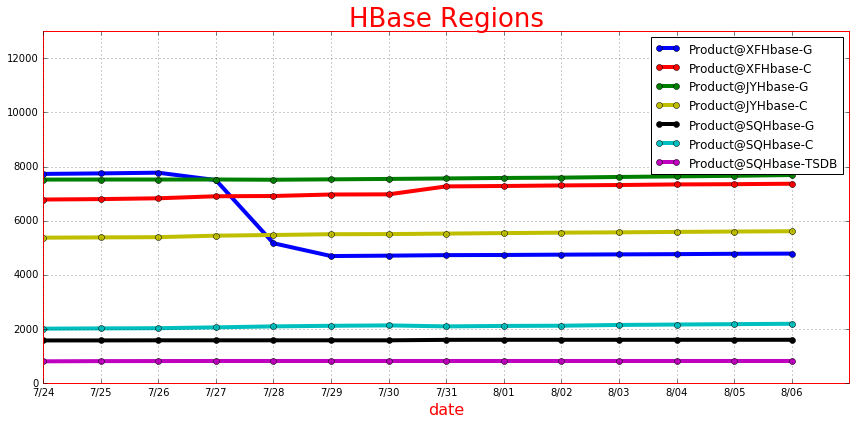

In [9]:
# 9 
reg = region(month=7, day=10, date_tube=date_tube)
reg()

#### 1、襄樊通用业务集群regionserver数为14，平均region数311每天平均增加 0.38个region;    
#### 2、襄樊通用业务集群(流量)regionserver数为24，平均region数 354, 每天平均增长0.58个region; 
#### 3、揭阳流量业务集群regionserver数为20个，平均region数378 每天平均增长1.00个region;
#### 4、揭阳流量业务集群（流量）regionserver数为16个，平均region数343, 每天平均增长0.77reegion;
#### 5、宿迁通用业务集群regionserver数为19个，平均region数354每天平均增长0.15个region;
#### 6、宿迁通用业务集群（cdap）regionserver数为18个，平均region数378, 每天平均增长0.76reegion;
#### 7、揭阳通用业务集群（tsdb）regionserver数为10个，平均region数336, 每天平均增长 0 region;

In [30]:
class hdfs_balance:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def balance_data(self, s):
        with open(s) as files:
            f = files.readlines()
            dataset = []
            for data in f:
                d = re.split(':', data)
                dataset.append(float(d[1].strip('\n')))
            return dataset

    def data_write10(self):
        with open('./write/10hdfs_stabel/hdfs.dat','w') as files:
            #namelist = ['GDNS@XF', 'Product@JY', 'Product@XF', 'WsLog-JX']
            namelist = ['GDNS@XF', 'Product@JY', 'Product@XF', 'WsLog-HZ', 'WsLog-JX']
            data = {}
            month = self.month; daystart = self.day
            for name in namelist:
                data[name] = self.balance_data('./result/10hdfs_stabel/%s.dat'%name)
            files.write('%s  %20s  %20s   %20s  %20s\n'%('date', namelist[0], namelist[1],
                                                                namelist[2], namelist[3]))
            count = 0; count_day = 1
            for d in data[namelist[0]]:
                daystart += 1
                if daystart >= 30:
                    month += 1
                    daystart = 1
                #files.write('%s/%s   %20s   %20s   %20s  %20s   %20s\n'%(month, daystart, data[namelist[0]][count], data[namelist[1]][count],
                                                    #data[namelist[2]][count], data[namelist[3]][count], data[namelist[4]][count]))
                files.write('%s/%s   %20s   %20s   %20s  %20s\n'%(month, daystart, data[namelist[0]][count], data[namelist[1]][count],
                                                    data[namelist[2]][count], data[namelist[3]][count]))
                count += 1; count_day += 1

    def figure_hdfs(self):
        data = {}; data_smooth = {}
        namelist = ['GDNS@XF', 'Product@JY', 'Product@XF', 'WsLog-HZ', 'WsLog-JX']
        #namelist = ['GDNS@XF', 'Product@JY', 'Product@XF', 'WsLog-JX']

        for name in namelist:
            data[name] = self.balance_data('./result/10hdfs_stabel/%s.dat'%name)
            # print data[name], len(data[name])
        fig, ax = plt.subplots()
        fig.set_size_inches(13, 4)
        x = np.arange(0, 14)
        x_smooth = np.linspace(x.min(), x.max(), 200)
        for name in namelist:
            data[name] = np.array(data[name])
            data_smooth[name] = spline(x, data[name], x_smooth)
        for name in namelist:
            ax.plot(x_smooth, data_smooth[name], linestyle='-', label=name, linewidth ='4')
        # Colorcode the spine of the graph
        ax.spines['bottom'].set_color('r')
        ax.spines['top'].set_color('r')
        ax.spines['left'].set_color('r')
        ax.spines['right'].set_color('r')

        # Put the title and labels
        ax.set_title('HDFS_Uniformly', color='red', fontsize=26)
        ax.set_xlabel('date', color='red', fontsize=16)
        ax.set_ylabel('', color='red', fontsize=16)
        ax.set_xticks(np.arange(0,14))
        ax.set_xticklabels(self.date_tube)
        ax.legend(loc='upper left')
        # Show the plot/image
        plt.tight_layout()
        plt.grid(alpha=0.8)
    #    plt.legend()
        #plt.show()
        savefig('./figure/hdfs_stabel')

    def __call__(self):
        self.data_write10()
        self.figure_hdfs()

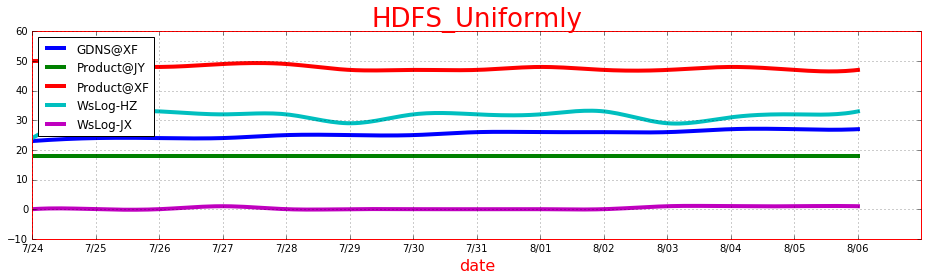

In [32]:
# 10 
hd = hdfs_balance(month=month, day=day, date_tube=date_tube)
hd()

#### 上上周襄樊 hdfs的存储分布不均衡

In [33]:
class MR:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def data_MR(self, s1):
        with open('./result/12MRjob/jobnum_%s'%s1) as files1:
            fw1 = open('./write/12MRjob/jobnum_%s.dat'%s1, 'w')
            f = files1.readlines()
            data_num = {}
            for data in f:
                key = re.split('\|', data)[1].strip(' ')
                value = re.split('\|', data)[2].strip(' ')
                data_num[key] = int(value)
                fw1.write('%s   %15s\n'%(key, value))

        with open('./result/12MRjob/jobrw_%s'%s1) as files2:
            fw = open('./write/12MRjob/jobrw_%s.dat'%s1, 'w')
            f = files2.readlines()
            data_rw = {}
            valuesum = 0.0; valuesum1 = 0.0
            for data in f:
                key = re.split('\|', data)[1].strip(' ')
                data_rw[key] = []
                value = re.split('\|', data)[2].strip(' ')
                value1 = re.split('\|', data)[3].replace(' ','').strip('\n')
                valuesum += float(value)
                valuesum1 += float(value1)
                values = byte(value)
                values1 = byte(value1)
                data_rw[key].append(values)
                data_rw[key].append(values1)
                fw.write('%s  %15s  %15s\n'%(key, values, values1))
            fw.close()
            #print byte(str(valuesum)), byte(str(valuesum1)), valuesum
        return data_rw, data_num
    def get_job_failed(self, name):
        with open('result/12MRjob/jobfailed_%s'%name) as files3:
            f = files3.readlines()
            for data in f:
                app_name = re.split(r"\|", data)[0].strip(' ')
                user = re.split(r"\|", data)[1].strip(' ')
                numb = re.split(r'\|', data)[2].replace(' ','').strip('\n')
                u_name = user+'.'+app_name
                yield u_name, numb
    def figure(self):
        align = 'left'; clr = 'black'
        fig, ax = subplots(2,1)
        fig.set_size_inches(8, 6)
        la = {}; da = {}
        for name in ['xf','jy']:
            la[name] = []; da[name] = []
            for u_name,numb in self.get_job_failed(name):
                la[name].append(u_name)
                da[name].append(int(numb))
            #print la[name], da[name]
            
        x = np.arange(0, 5*len(da['xf']), 5)
        ax[0].barh(x, da['xf'])
        ax[0].set_yticks(x+0.5)
        ax[0].set_title(str("cluster_xf"), color='red', fontsize=20)
        ax[0].set_yticklabels(la['xf'], fontsize=16)
        ax[0].set_xlim(0, 5)
        #x = np.arange(0, 5*len(da['jy']), 5)
        #ax[1].barh(x, da['jy'])
        #ax[1].set_yticks(x+0.5)
        ax[1].set_title(str("cluster_jy"), color='red', fontsize=20)
        #ax[1].set_yticklabels(la['jy'], fontsize=16)
        #ax[1].set_xlim(0, 5)
    
    def getdata_MR(self):
        namelist = ['xf', 'jy']
        for name in namelist:
            self.data_MR(name)
    def debug(self):
        for u_name,numb in self.get_job_failed():
            print "he", u_name, numb

    def __call__(self):
        self.getdata_MR()
        #self.get_job_failed()
        self.figure()

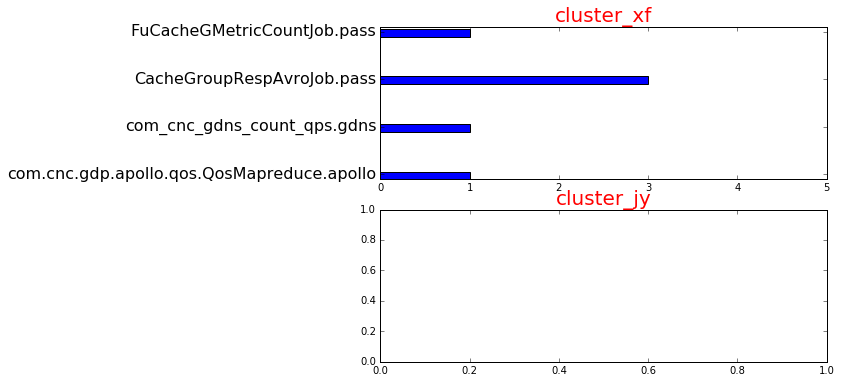

In [34]:
# 12 
mr = MR(month=month, day=day, date_tube=date_tube)
mr()

### 12-MR作业计算量

![Altext](figure/12mr.jpg)

### ECHO  告警量

In [53]:
class ECHO:
    def __init__(self, month=None, day=None, date_tube=None):
        self.month = month
        self.day = day
        self.date_tube = date_tube

    def write_echo(self):
        with open('./result/13ECHO/echo') as files:
            file1 = open('./write/13ECHO/echo', 'w')
            f = files.readlines()
            for data in f:
                d = []
                da = re.split('\|', data)
                for i in range(len(da)):
                    #print da[i].strip(' ')
                    d.append(da[i].strip(' '))
                file1.write('%20s  %10s  %10s  %10s  %10f  %10s  %10s   %10s\n'%(d[0], d[1], d[2], d[3],
                                float(d[3])/(float(d[2])+float(d[3])), d[4], byte(d[5]), byte(d[6])))
        #file1.close()
    def __call__(self):
        self.write_echo()

In [54]:
# 13 
echo = ECHO(month=month, day=day, date_tube=date_tube)
echo()

![Altext](figure/13echo.jpg)

#### CDNHistoricalFileJobScheduleService、CDNHistoricalFileDNAService 服务失败率升高， jobscheduleservice失败率
